# Advices for private investors in small loans based on prosper.com
<ul>
<li><a href="#intro">Introduction</a></li>
 <ul>
    <li><a href="#borrowers_rating">1. How are borrowers rated?</a></li>
    <li><a href="#borrowers_rating_time">2. How does the borrowers rating evolve over time (2009- 2014)?</a></li>  
    <li><a href="#loan_categories">3. What are borrowers taking loans for?</a></li>
    <li><a href="#loan_categories_time">4. How do loan categories evolve over time?</a></li>
    <li><a href="#loan_categories_amounts">5. Which amount have loans in each category?</a></li>
    <li><a href="#loan_categories_defaults">6. Which loan categories have most defaults?</a></li>
    <li><a href="#loan_categories_states">7. What is the best state and category to invest based on default rate</a></li>
 </ul>
 <li><a href="#conclusion">Conclusion</a></li>
</ul>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
blue = sb.color_palette()[0]
pd.options.display.max_columns = None

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
df_loan = pd.read_csv('data/prosperLoanData.csv')
df_loan_with_outcome = pd.read_csv('data/loan_with_outcome.csv')

C:\Tools\Anaconda3\envs\cuda\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (4,15,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_loan_2006 = pd.read_csv('data/loan_2006.csv')
df_loan_2009 = pd.read_csv('data/loan_2009.csv')

C:\Tools\Anaconda3\envs\cuda\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_loan_without_debt_2006 = pd.read_csv('data/loan_without_debt_2006.csv')
df_loan_without_debt_2009 = pd.read_csv('data/loan_without_debt_2009.csv')

In [7]:
df_indebted_distribution_scores = pd.read_csv('data/indebted_distribution_scores.csv')
df_indebted_distribution_grades = pd.read_csv('data/indebted_distribution_grades.csv')

<a id='intro'></a>
<img src="images/return_risk.png" width="400" height="400" align="right">
# Final Project "prosper.com"

**Prosper likes to promote the fact that every investor since 2009 (Prosper 2.0) that has invested in at least 100 loans has made a positive return.** (Source: https://www.lendacademy.com/prosper-review/)

The interpretation of the sentence is a bit tricky: Does it mean at least one loan got a positive return while the rest got lost or returned less than invested? Or is the total return adressed? What if we take the 100 worst loans, is there still a positive return? 

To get out of this ambiguity we take a simpler question. Instead of asking: What to do to maximize returns - we take a more defensive approach. What shall an investor do to avoid losses?  In time of zero interest rates provided by banks we consider an positive return already as achievement. 

- We want to know which type of loan is least likely to default. Since everything is changing constantly we need to investigate the distribution of loan types over time to get a feeling for trends and further evolution. 
- We also look at the geographic distribution of loans and their liklyhood to default. 
- The combination of default rates for loan category with the geographic default risk is our first rule of thumb as aspiring investors.

In [8]:
listing_categories = [ 'Not Available',
 'Debt Consolidation',
 'Home Improvement',
 'Business',
 'Personal Loan',
 'Student Use',
 'Auto',
 'Other',
 'Baby&Adoption',
 'Boat',
 'Cosmetic Procedure',
 'Engagement Ring',
 'Green Loans',
 'Household Expenses',
 'Large Purchases',
 'Medical/Dental',
 'Motorcycle',
 'RV',
 'Taxes',
 'Vacation',
 'Wedding Loans']

In [9]:
listing_categories_8 = ['Not Available',
 'Debt Consolidation',
 'Home Improvement',
 'Business',
 'Personal Loan',
 'Student Use',
 'Auto',
 'Other']

In [10]:
listing_categories_without_debt = [ 
 'Home Improvement',
 'Business',
 'Personal Loan',
 'Student Use',
 'Auto',
 'Other',
 'Baby&Adoption',
 'Boat',
 'Cosmetic Procedure',
 'Engagement Ring',
 'Green Loans',
 'Household Expenses',
 'Large Purchases',
 'Medical/Dental',
 'Motorcycle',
 'RV',
 'Taxes',
 'Vacation',
 'Wedding Loans']

listing_categories_short = ['Debt',
 'Home',
 'Business',
 'Personal',
 'Student']
listing_categories_short

['Debt', 'Home', 'Business', 'Personal', 'Student']

In [11]:
prosper_rating_categories = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

In [12]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [13]:
loan_org_quarter_categories = ['2009 Q3', '2009 Q4', '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4',
       '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4', '2012 Q1', '2012 Q2',
       '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4',
       '2014 Q1']

<a id='borrowers_rating'></a>
## 1. How trust worthy are borrowers?


To the 83.982 listed loans in the investigated dataset 68989 borrowers are associated.
Most borrowers have good to medium prosper ratings (A to D). 
We would expect borrowers with high scores to be exceptional trust worthy. So among these borrowers debt rate shouldn't be higher than 100%. Is it like this?

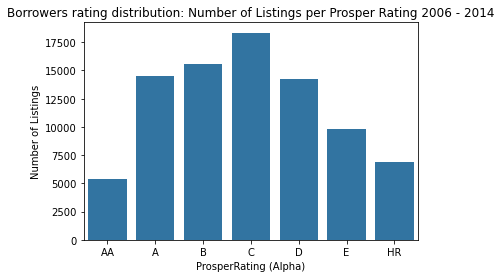

In [14]:
sb.countplot(data=df_loan, x='ProsperRating (Alpha)', 
             color=blue, 
             order=prosper_rating_categories);
plt.ylabel('Prosper Rating');
plt.ylabel('Number of Listings');
plt.title('Borrowers rating distribution: Number of Listings per Prosper Rating 2006 - 2014'); 

### Before 2009
Before 2009 borrowers with debt income ratio above 100% were normally distributed across the credit grades. This means a part of them unless highly indebted got very good and good credit grades. The credit grade was misleading in that cases.

In [15]:
df_indebted_distribution_grades.set_index('CreditGrade', inplace=True)

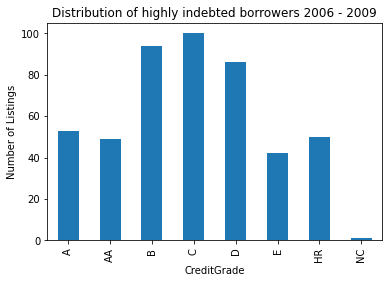

In [16]:
barplot = df_indebted_distribution_grades.plot(kind='bar', 
                                              title='Distribution of highly indebted borrowers 2006 - 2009',
                                              legend=False);
barplot.set_ylabel('Number of Listings');

In [17]:
df_indebted_distribution_scores.set_index('ProsperRating (Alpha)', inplace=True)

### After 2009
After the financial crisis 2008-2009 the ratings got better and are now more trust worthy. Nevertheless thereare still some black sheeps among them.

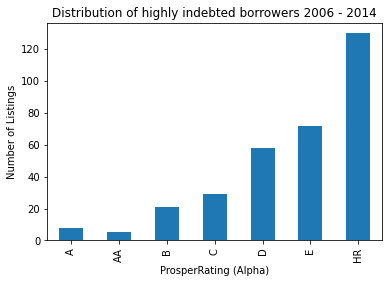

In [18]:
barplot = df_indebted_distribution_scores.plot(kind='bar',
                                              title='Distribution of highly indebted borrowers 2006 - 2014',
                                              legend=False);
barplot.set_ylabel('Number of Listings');

<a id='borrowers_rating_time'></a>
## 2. How does the borrowers rating evolve over time (2009- 2014)?

- The total number of listings increases over time, which probably has multiple root causes:
    - the prosper platform gains popularity over time
    - the debt amount increases over time
- Interesting is the evolution of prosper scores over time. One year after the financial crisis lenders are still very risk aversive. Most loans are made for the highest prosper score. Starting with 2011 the medium prosper scores apply for and receive the most loans. Situation changes with starting with 2013: now the lower prosper scores gain the most loans. End of 2013 the amount of listings explodes, most loans go to low prosper scores. Until end of 2012 the highest prosper scores stagnated. In 2013 and later the demand from highly scored borrowers increases as well drastically.


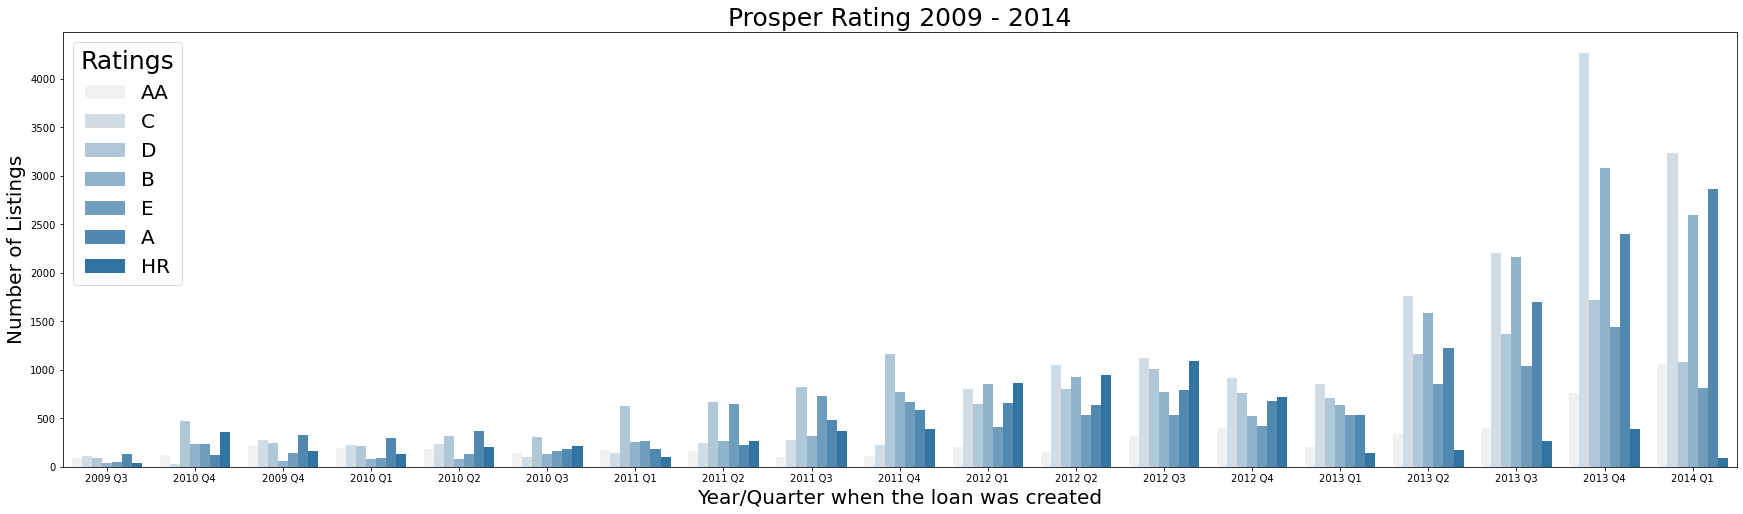

In [19]:
df_loan_2009 = df_loan_2009.sort_values(['ListingCreationDate'])
plt.figure(figsize=(30,8))
ax = sb.countplot(x="LoanOriginationQuarterNew", 
                  hue="ProsperRating (Alpha)", 
                  color=blue, 
                  data=df_loan_2009);
plt.xlabel('Year/Quarter when the loan was created', fontsize=20);
plt.ylabel('Number of Listings', fontsize=20);
plt.title('Prosper Rating 2009 - 2014', fontsize=25);
plt.legend(loc='upper left',fontsize=20, title='Ratings', title_fontsize=25);

<a id='loan_categories'></a>
## 3. What are borrowers taking loans for?

- Over 50.000 loans are given for debt consolidation, that is the most common reason fpr taking a loan.
- Around 9.000 loans are taken for bying cars, over 6.000 for home improvements, 5.000 for business purposes and around 2.000 for students needs.

In [20]:
def get_existing_categories_subset(df_data, listing_categories):
    arr_categories = df_data['ListingCategory (numeric)'].unique()
    arr_categories.sort()
    listing_categories_subset = [listing_categories[i] for i in arr_categories]
    return listing_categories_subset

listing_categories_subset = get_existing_categories_subset(df_loan_2009, listing_categories)

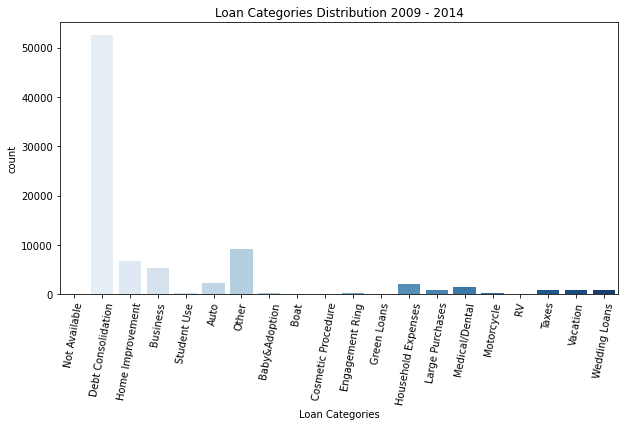

In [21]:
plt.figure(figsize = [10, 5]);
cp = sb.countplot(data=df_loan_2009, 
                  x='ListingCategory (numeric)', 
                  palette=sb.color_palette("Blues", 20));
cp.set_xticklabels(listing_categories_subset);
plt.xticks(rotation=80);
cp.set_xlabel('Loan Categories')
cp.set_title('Loan Categories Distribution 2009 - 2014');

<a id='loan_categories_time'></a>
## 4. How do loan categories evolve over time?


In [22]:
def plot_loan_catgeories_over_time(df_data, legend, xticklabels, title):
    cp = sb.countplot(data=df_data,
                      x="LoanOriginationQuarterNew", 
                      hue="ListingCategory (numeric)", 
                      color=blue
                      );
    cp.set_xlabel('Year / Quarter', fontsize=20);
    cp.set_ylabel('Number of Listings', fontsize=20);
    cp.set_xticklabels(xticklabels, fontsize=12);
    cp.legend(legend, bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0.1, fontsize=10);
    legend = cp.get_legend();
    cp.set_title(title, fontsize=25);

Highest amount of listings go to debt consolidation, in 2013 over 10 times more than 2010 - do the borowers turn to the prosper loan platform if the can not get loans from banks anymore?

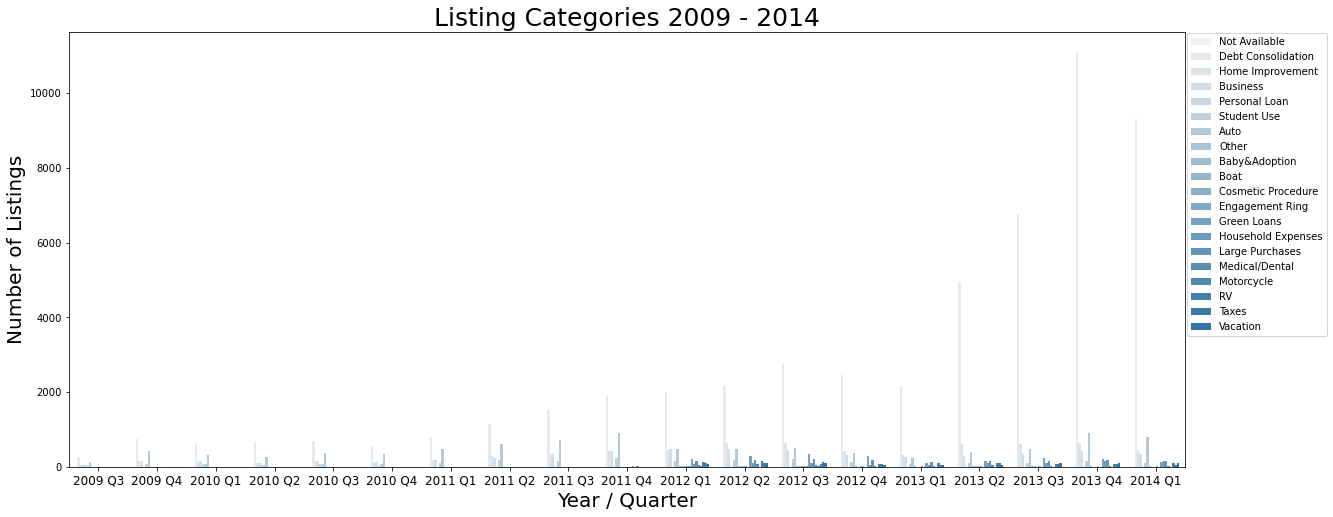

In [23]:
plt.figure(figsize = [20, 8]);
plot_loan_catgeories_over_time(df_loan_2009, 
                               listing_categories, 
                               loan_org_quarter_categories,
                              'Listing Categories 2009 - 2014');

Until end of 2011 loans felt mainly in 4 categories: Home Improvement, Business, Student Use and Auto
Highest Positon here got the loans for cars

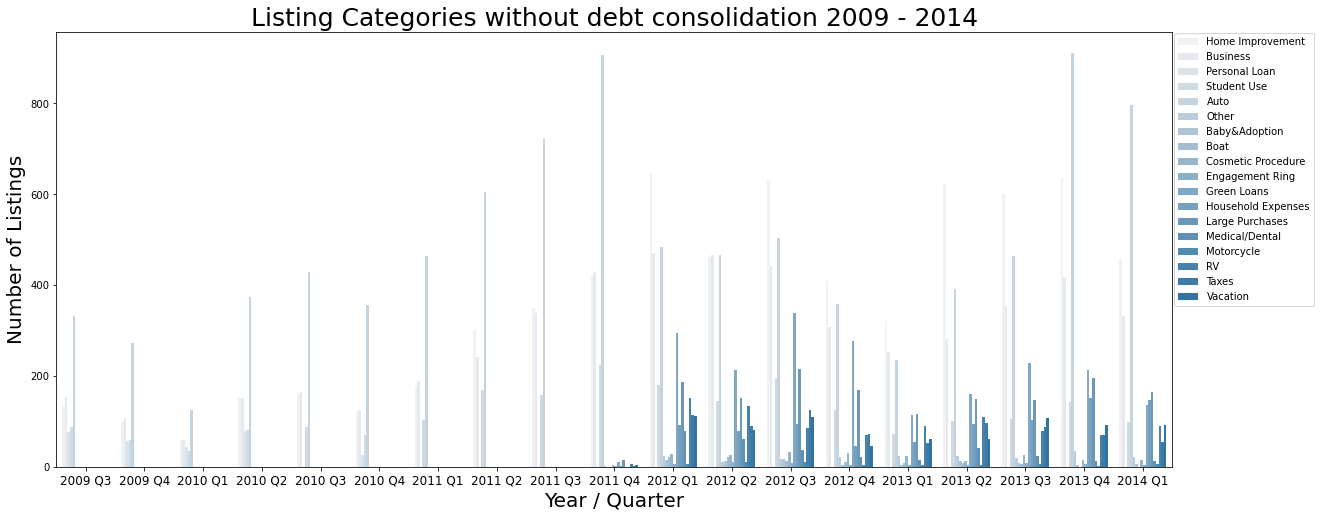

In [24]:
plt.figure(figsize = [20, 8]);
plot_loan_catgeories_over_time(df_loan_without_debt_2009, 
                               listing_categories_without_debt, 
                               loan_org_quarter_categories,
                              'Listing Categories without debt consolidation 2009 - 2014');

<a id='loan_categories_amounts'></a>
## 5. Which amount of loans are in each category?

### Before 2009
- Between 2006 and 2009 much less loan categories existed. 
- Much more loans were taken for business than for debt consolidation.
- But what looks like a healthy economy turned into the desaster of 2008/2009.
- Thats the warning for investors: Do not rely an categories.

In [25]:
def plot_loan_amounts(df_data, xticklabels, title):
    plt.figure(figsize = [30, 8]);
    cp = sb.boxplot(data=df_data, 
               x='ListingCategory (numeric)', 
               y='LoanOriginalAmount',
               palette=sb.color_palette("Blues", 20));

    cp.set_xticklabels(xticklabels, fontsize=15);
    cp.set_xlabel('Loan Categories', fontsize=20);
    cp.set_ylabel('Amount of Loans in $', fontsize=20);
    cp.set_title(title, fontsize=25);
    plt.xticks(rotation=15);

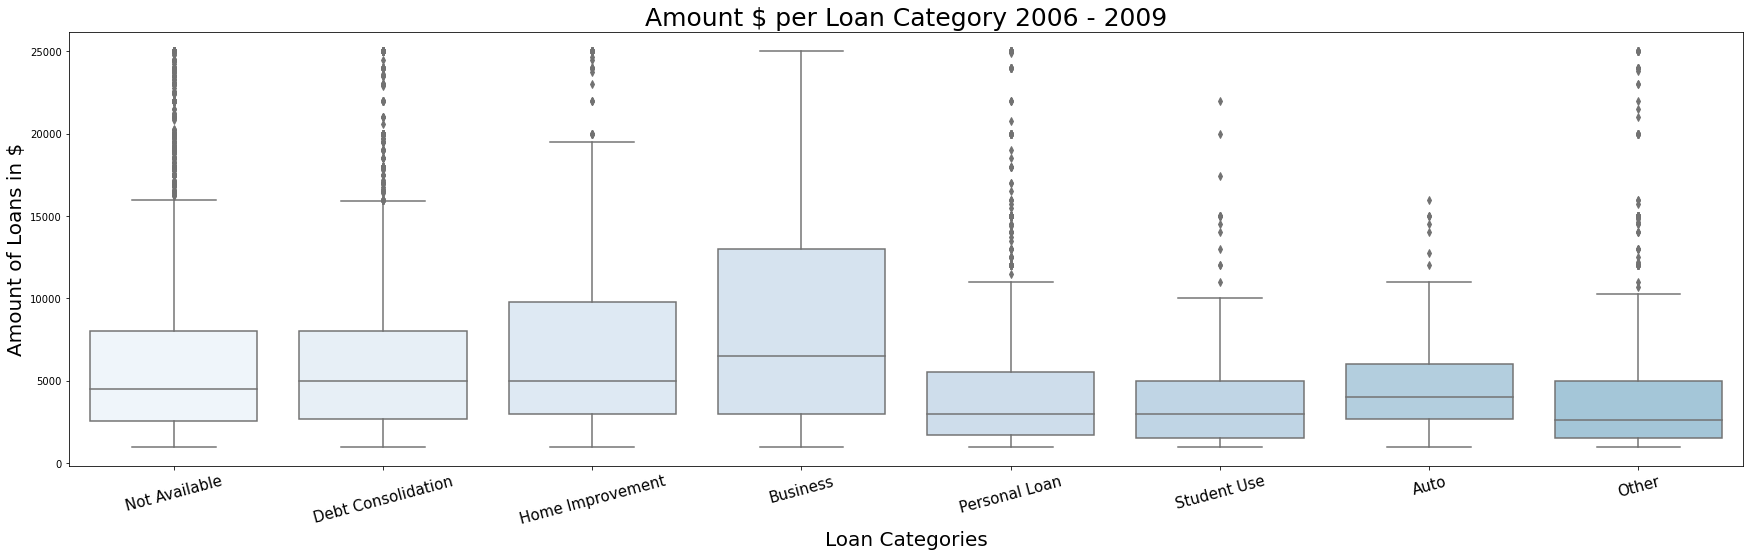

In [26]:
 plot_loan_amounts(df_loan_2006,
                 listing_categories_8,
                 'Amount $ per Loan Category 2006 - 2009')

### After 2009
- Highest loans are taken for debt consolidation. This reflects the situation after the finacial crisis.
- The mean for debt consolidation loans is around 10.000 Dollar 
- The upper boundary for debt consolidation loans is around 30.000 Dollar
- A second group of loans has a mean around 8.000 Dollar: home improvements, business, baby adoptions, household expenses, motorcycles,RV (trailers) and vacations.
- The mean of all other categories is between 4.000 and 6.000 Dollar.
- The lowest loans are personal loans.

In [27]:
listing_categories_subset = get_existing_categories_subset(df_loan_2009, listing_categories)

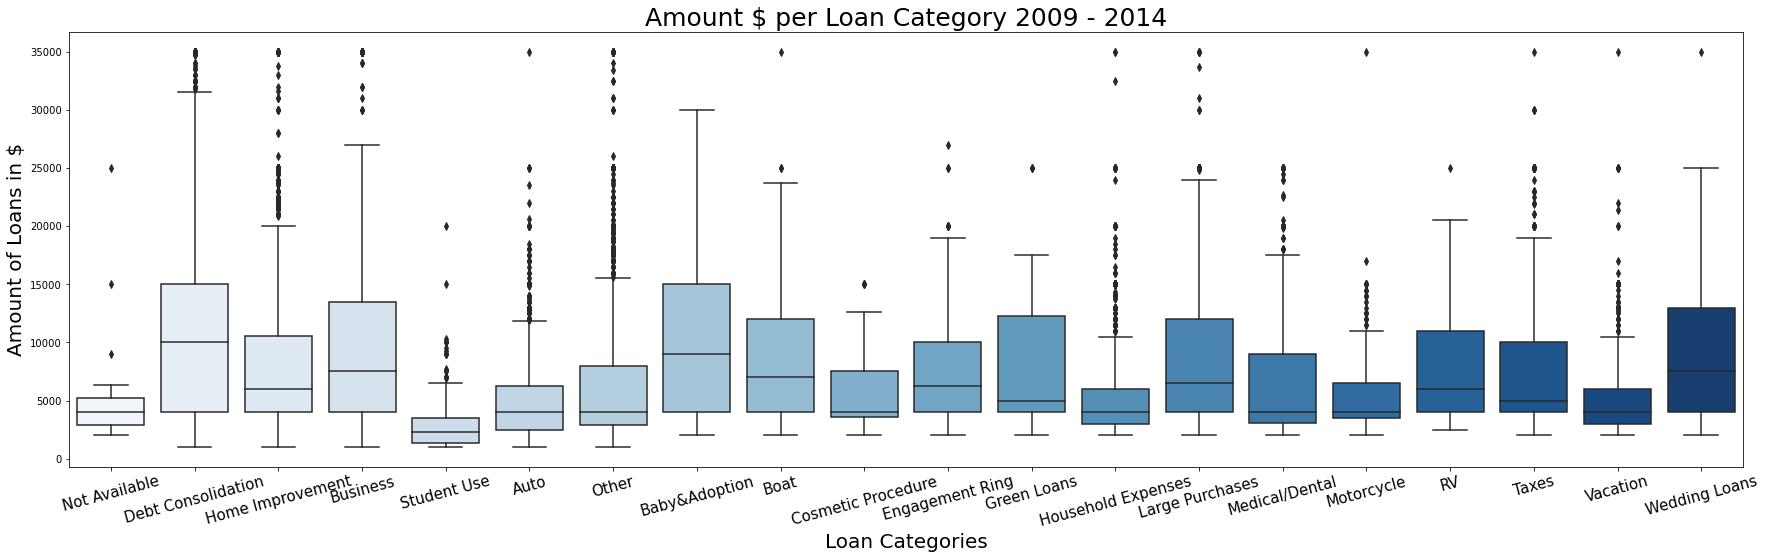

In [28]:
plot_loan_amounts(df_loan_2009,
                 listing_categories_subset,
                 'Amount $ per Loan Category 2009 - 2014')

<a id='loan_categories_defaults'></a>
## 6. Which loan categories have most defaults?

- Almost a third of all auto loans default, for business loans the rate is equally bad
- Loans for students use have a better rate around 25%


C:\Tools\Anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


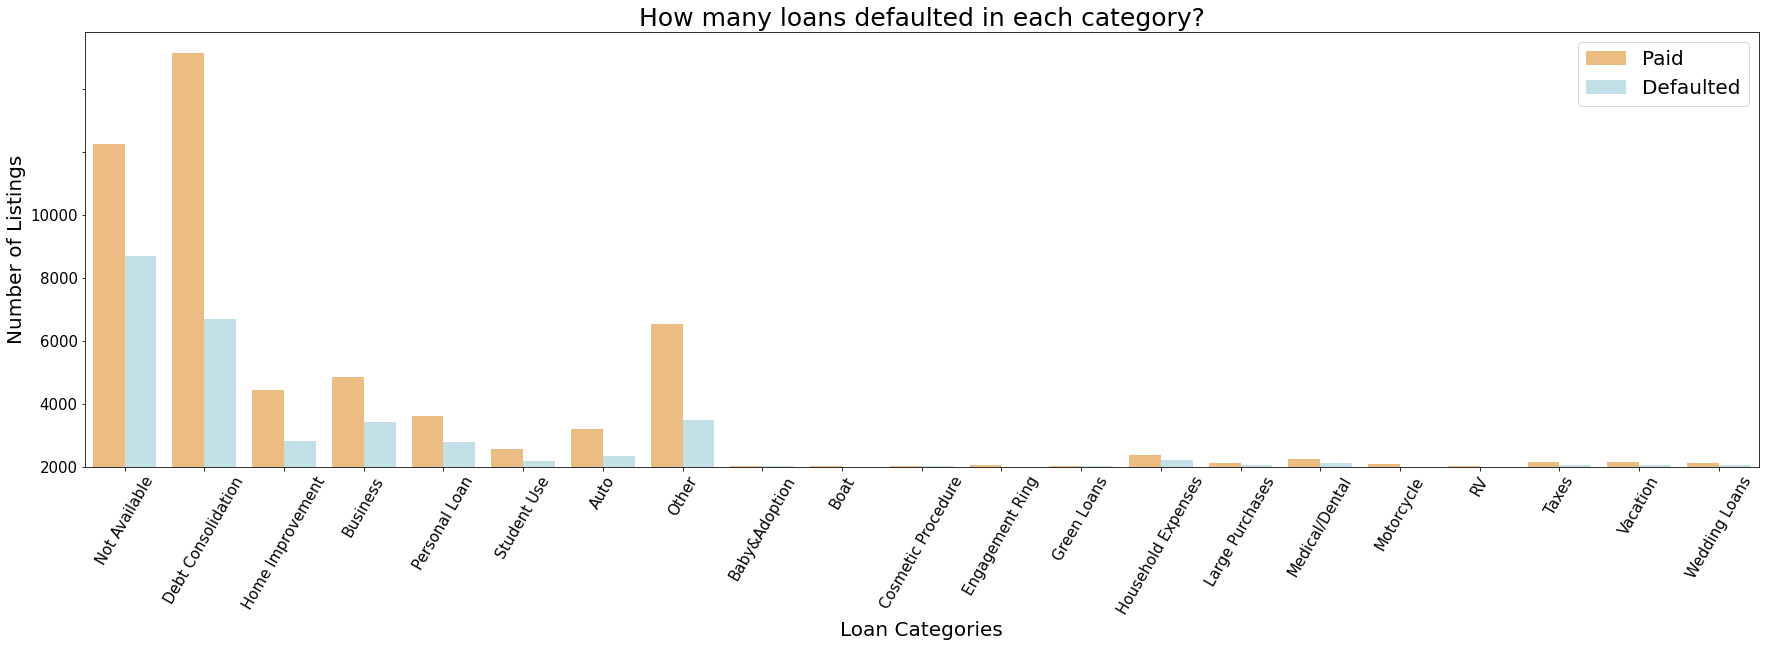

In [29]:
plt.figure(figsize = [30, 8]);
cp = sb.countplot(data=df_loan_with_outcome, 
                  x='ListingCategory (numeric)', 
                  hue='Loan Outcome', 
                  palette=sb.color_palette("RdYlBu", 2)
                 );
cp.set_xticklabels(listing_categories, fontsize=15);
cp.set_yticklabels([2000, 4000, 6000, 8000, 10000], fontsize=15)
plt.xticks(rotation=60);
plt.legend(fontsize=20)
cp.set_xlabel('Loan Categories', fontsize=20);
cp.set_ylabel('Number of Listings', fontsize=20);
cp.set_title('How many loans defaulted in each category?', fontsize=25);

<a id='loan_categories_states'></a>
## 7. What is the best state and category to invest based on default rate?


Considering only states and categories with at least 10 loans:

If you got one of the 14 business loans in Idaho or one of the 17 home improvement loans in New Hampshire you had no chance for any default. All states with very few loans tend to have low default rates.

If you as an investor turn to states with higher amounts of loans, for instance California with 1675 loans for debt consolidation you have to accept a mean likelyhood of default of 19%. 

The highest default rate has Los Angeles with 67% for cars.

In [30]:
df_loan_with_outcome_categ = df_loan_with_outcome[(df_loan_with_outcome['ListingCategory (numeric)']<7) & (df_loan_with_outcome['ListingCategory (numeric)']>0)]

In [31]:
df_state_cat_rate = df_loan_with_outcome_categ.groupby(['BorrowerState', 'ListingCategory (numeric)', 'Loan Outcome']).size().unstack('Loan Outcome')
df_state_cat_rate = df_state_cat_rate.fillna(0)
df_state_cat_rate.loc['NY']
df_state_cat_rate

Loan Outcome,Defaulted,Paid
ListingCategory (numeric),,
1,219.0,793.0
2,45.0,138.0
3,58.0,143.0
4,23.0,79.0
5,8.0,34.0
6,19.0,54.0


Loan Outcome                             Defaulted  Paid
BorrowerState ListingCategory (numeric)                 
AK            1                                5.0  23.0
              2                                2.0  11.0
              3                                2.0   7.0
              4                                2.0   5.0
              5                                0.0   2.0
...                                            ...   ...
WY            2                                0.0   4.0
              3                                1.0   2.0
              4                                1.0   4.0
              5                                0.0   1.0
              6                                0.0   3.0

[299 rows x 2 columns]

In [32]:
df_state_cat_rate['TotalCount'] = df_state_cat_rate['Defaulted'] + df_state_cat_rate['Paid']
#default_rate = default * 100 / (default+paid)
df_state_cat_rate['DefaultRate'] = round(df_state_cat_rate['Defaulted'] * 100 / (df_state_cat_rate['Paid'] + df_state_cat_rate['Defaulted']))

In [33]:
print('Main categories ordered ascending by default rate per state (with at least 10 loans in the category):')
df_cat_per_state = df_state_cat_rate[df_state_cat_rate['TotalCount']>10]
df_cat_per_state.sort_values('DefaultRate').head(10)

Main categories ordered ascending by default rate per state (with at least 10 loans in the category):


,Loan Outcome,Defaulted,Paid,TotalCount,DefaultRate
BorrowerState,ListingCategory (numeric),,,,
NH,2,0.0,21.0,21.0,0.0
TX,4,0.0,18.0,18.0,0.0
UT,5,0.0,12.0,12.0,0.0
NM,3,1.0,18.0,19.0,5.0
UT,6,1.0,13.0,14.0,7.0
NE,3,1.0,12.0,13.0,8.0
NV,6,1.0,11.0,12.0,8.0
NE,4,1.0,10.0,11.0,9.0
DC,2,1.0,10.0,11.0,9.0


In [34]:
print('Main categories ordered descending by default rate per state (with at least 10 loans in the category):')
df_cat_per_state.sort_values('DefaultRate', ascending=False).head(10)

Main categories ordered descending by default rate per state (with at least 10 loans in the category):


,Loan Outcome,Defaulted,Paid,TotalCount,DefaultRate
BorrowerState,ListingCategory (numeric),,,,
LA,6,8.0,6.0,14.0,57.0
NH,3,6.0,5.0,11.0,55.0
KY,3,15.0,15.0,30.0,50.0
AR,4,9.0,9.0,18.0,50.0
AL,5,8.0,8.0,16.0,50.0
MD,3,51.0,55.0,106.0,48.0
AL,3,20.0,22.0,42.0,48.0
ME,1,15.0,17.0,32.0,47.0
ID,2,7.0,8.0,15.0,47.0


In [35]:
print('Default rate per state for category Debt Consolidation:')
df_debts_per_state = df_state_cat_rate[df_state_cat_rate.index.get_level_values('ListingCategory (numeric)').isin([1])]
df_debts_per_state.sort_values('DefaultRate').head(10)

Default rate per state for category Debt Consolidation:


,Loan Outcome,Defaulted,Paid,TotalCount,DefaultRate
BorrowerState,ListingCategory (numeric),,,,
DC,1,14.0,79.0,93.0,15.0
WY,1,3.0,16.0,19.0,16.0
AK,1,5.0,23.0,28.0,18.0
CO,1,75.0,310.0,385.0,19.0
MT,1,11.0,43.0,54.0,20.0
TX,1,156.0,596.0,752.0,21.0
MA,1,81.0,304.0,385.0,21.0
WV,1,14.0,50.0,64.0,22.0
UT,1,34.0,124.0,158.0,22.0


In [36]:
ordered_categories = df_loan_with_outcome_categ['ListingCategory (numeric)'].value_counts().index
ordered_categories

Int64Index([1, 3, 2, 4, 6, 5], dtype='int64')

In [37]:
ordered_states = df_loan_with_outcome_categ['BorrowerState'].value_counts().index
ordered_states

Index(['CA', 'FL', 'IL', 'NY', 'GA', 'TX', 'OH', 'VA', 'MI', 'WA', 'NC', 'MO',
       'PA', 'MD', 'MN', 'NJ', 'CO', 'IN', 'MA', 'OR', 'AZ', 'WI', 'TN', 'AL',
       'CT', 'UT', 'SC', 'OK', 'KS', 'KY', 'NV', 'ID', 'LA', 'MS', 'AR', 'NE',
       'NH', 'DC', 'NM', 'RI', 'WV', 'HI', 'MT', 'IA', 'DE', 'AK', 'ME', 'VT',
       'SD', 'WY', 'ND'],
      dtype='object')

In [38]:
arr = df_loan_with_outcome_categ['ListingCategory (numeric)'].unique()
arr.sort()
arr


listing_categories_subset

array([1, 2, 3, 4, 5, 6], dtype=int64)

['Not Available',
 'Debt Consolidation',
 'Home Improvement',
 'Business',
 'Student Use',
 'Auto',
 'Other',
 'Baby&Adoption',
 'Boat',
 'Cosmetic Procedure',
 'Engagement Ring',
 'Green Loans',
 'Household Expenses',
 'Large Purchases',
 'Medical/Dental',
 'Motorcycle',
 'RV',
 'Taxes',
 'Vacation',
 'Wedding Loans']

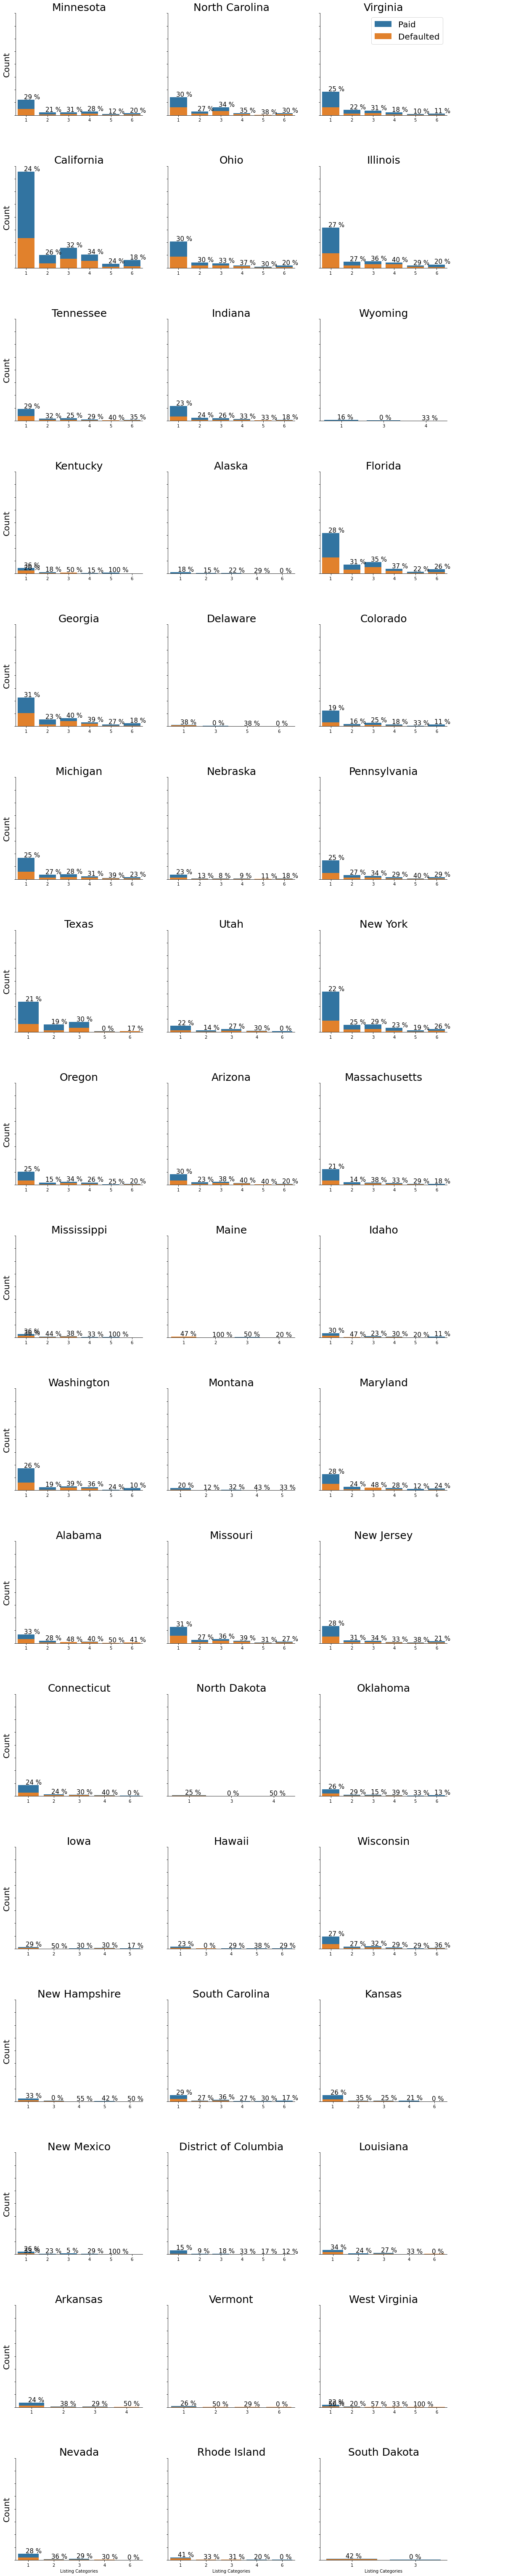

In [39]:
# TODO: percentage looks odd, simplify logic
from IPython.utils import io
with io.capture_output() as captured:
    grid = sb.FacetGrid(data=df_loan_with_outcome_categ, 
                     col="BorrowerState", 
                     hue="Loan Outcome", 
                     col_wrap=3,
                     height=5,
                     #aspect =1,
                     sharex=False,
                     sharey=True,
                     legend_out=True,
                     row_order=ordered_states
                    );
    cp = grid.map(sb.countplot, 'ListingCategory (numeric)');
    grid.set_xlabels('Listing Categories', fontsize=10);
    grid.set_ylabels('Count', fontsize=20);
    #     listing_categories_subset = get_existing_categories_subset(df_loan_with_outcome_categ, listing_categories)
    #     grid.set_xticklabels(listing_categories_subset, rotation= 60, fontsize=8);
    grid.set_yticklabels(fontsize=15);
    grid.fig.subplots_adjust(hspace=0.5, wspace=0.2);
    axes = grid.axes.flatten();
    grid.axes[2].legend(fontsize=20);


    for ind, axe in enumerate(axes, start=0):

        state = axe.title.get_text()[16:];    
        axe.set_title(states[state], fontsize=25);
    #     print('len(axe.patches) is: ', len(axe.patches))
        index_of_indices=0
        for aind, p in enumerate(axe.patches, start=0): 
            x = p.get_x() + p.get_width()/2-0.1;
            y = p.get_y() + p.get_height() + 15.0;
            percentage = '0 %'
            try:
                arr_index = df_state_cat_rate.loc[state].index
                index = arr_index[index_of_indices]
                result = df_state_cat_rate.loc[state, (index)]
                percentage = str(int(result['DefaultRate'])) + ' %';
                #         print(f'for {state} percentage is: {percentage}')
            except (TypeError, KeyError, IndexError) as e:
                print('Error: ', e)
                print('arr_index is: ', arr_index)
                print('index_of_indices is: ', index_of_indices)
                print('index is: ', index)
                print('result is: ', result)
                print('aind is: ', aind)
                print('p.get_y() is: ', p.get_y())
                print('p.get_height() is: ', p.get_height())
                print(df_state_cat_rate.loc[state])
                percentage = '0 %'

            axe.annotate(percentage, (x, y), fontsize=15);
            index_of_indices += 1
            if (index_of_indices >= len(axe.patches)/2):
                break

<a id='conclusion'></a>
# Conclusion

**Prosper likes to promote the fact that every investor since 2009 (Prosper 2.0) that has invested in at least 100 loans has made a positive return.** (Source: https://www.lendacademy.com/prosper-review/)

We assume we invest 100 Dollar into 100 different loans on prosper platform - what can we do to achieve a positive return in total?

Since we now know that default rates for certain states and categories can go up to 67% we create a blacklist of the worst combinations starting with the Los Angeles Car loans.

We combine this with a whitelist of very low defaulting loans like the business credits in Idaho. Since this whitelist combinations tend to count only a few loans they likelyhood that we get one of them is very low.

A good average combination of state and category has a default rate between 20% and 25%.

But what does this mean? From our 100 invested Dollars 20 Dollar will probably be lost. Can the other 80% loans compensate that loss with their returns? For doing so, the successful loans should have a return rate of at least 25%. The maximum return rate for the worst prosper rates is 49%. As per what we saw on prosper.com medium prosper rates hat return rates around 20%. So we really doubt wether will be possible to compensate all losses with acting on medium risk levels. 

For investing successfully on prosper.com we not only combine black and white lists. We need a better strategy considering combinations of prosper ratings, state, category and tendencies over time. We could also investigate the impact of other attributes of the borrower like his occupation.